# Machine Learning Model to predict successful or failed consequence

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [8]:
X_train

,goal,pledged,levels,updates,comments,duration
0,1500.000000,0.0,7.0,1.0,0.0,30.000000
1,2000.000000,3266.0,6.0,7.0,2.0,45.000000
2,2000.000000,0.0,5.0,0.0,0.0,30.000000
3,3297.216133,0.0,5.0,0.0,0.0,31.920000
4,500.000000,125.0,4.0,0.0,0.0,29.960000
...,...,...,...,...,...,...
33567,2700.000000,35.0,8.0,0.0,1.0,34.045578
33568,19000.000000,220.0,5.0,1.0,3.0,71.110000
33569,1200.000000,1275.0,7.0,1.0,1.0,25.580000
33570,5000.000000,6060.0,17.0,4.0,3.0,29.280000


In [9]:
def print_results(results):
    print('BEST Params: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means,stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3), params))
    return means, stds

# Scaling and Norminalizing Data

In [11]:
from sklearn import preprocessing

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [57]:
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [16]:
X_train_minmax.mean(), X_train_minmax.std()

(0.30732285965695555, 0.25579323543508264)

### Logistic Classification without scaling

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [54]:
lr = LogisticRegression(max_iter=1000)

In [55]:
lr_param = {
    'C' : [0.001,0.01,0.1,1,10,100,1000],
    'fit_intercept' : [True,False],
}

In [56]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(lr,lr_param, cv= 10)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False]})

In [58]:
lr_mean_cv = print_results(cv)

BEST Params: {'C': 0.001, 'fit_intercept': False}

0.988 (+/-0.003) for {'C': 0.001, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 0.001, 'fit_intercept': False}
0.988 (+/-0.004) for {'C': 0.01, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 0.01, 'fit_intercept': False}
0.988 (+/-0.004) for {'C': 0.1, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 0.1, 'fit_intercept': False}
0.987 (+/-0.005) for {'C': 1, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 1, 'fit_intercept': False}
0.987 (+/-0.005) for {'C': 10, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 10, 'fit_intercept': False}
0.987 (+/-0.005) for {'C': 100, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 100, 'fit_intercept': False}
0.987 (+/-0.005) for {'C': 1000, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 1000, 'fit_intercept': False}


In [59]:
cv.best_estimator_

LogisticRegression(C=0.001, fit_intercept=False, max_iter=1000)

In [60]:
cv.cv_results_

{'mean_fit_time': array([0.178368  , 0.11469712, 0.23834255, 0.15960555, 0.29486499,
        0.26170411, 0.28240433, 0.19902666, 0.45989399, 0.22737064,
        0.31580715, 0.18492818, 0.1820924 , 0.16390753]),
 'std_fit_time': array([0.05522236, 0.02284565, 0.07301548, 0.03681422, 0.12982404,
        0.08800949, 0.09084829, 0.0454626 , 0.24966538, 0.06048099,
        0.08704512, 0.06075552, 0.03610796, 0.03425004]),
 'mean_score_time': array([0.00178442, 0.0020225 , 0.00257998, 0.00261381, 0.00363774,
        0.00346026, 0.00270259, 0.00367074, 0.00336659, 0.00237648,
        0.00239642, 0.00198567, 0.00181739, 0.00219991]),
 'std_score_time': array([0.00014326, 0.00049552, 0.00054195, 0.00121167, 0.00314469,
        0.00059569, 0.00022803, 0.00322192, 0.00149802, 0.0003575 ,
        0.00053093, 0.0005801 , 0.00023538, 0.00044206]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
              mask=[False, Fal

In [51]:
#Ploting CV in Graph
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(-1,len(grid_param_1)) #len(grid_param_2)

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(-1,len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1,figsize=(15,6))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
    
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

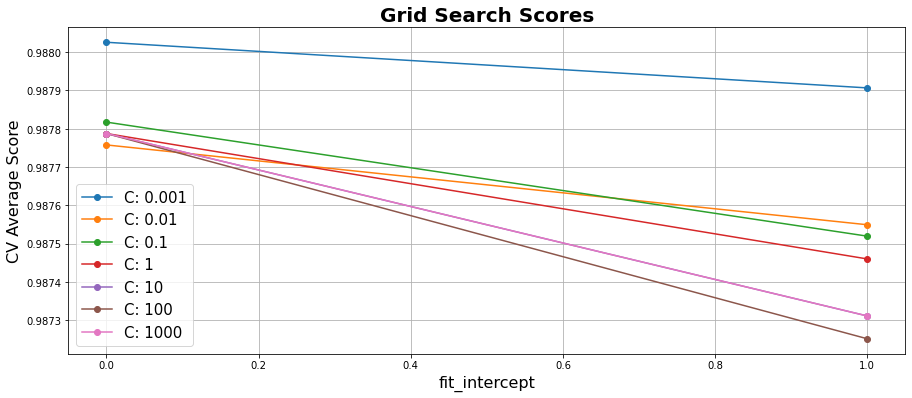

In [61]:
# Ploting Method 
plot_grid_search(cv.cv_results_, lr_param['fit_intercept'],lr_param['C'], 'fit_intercept', 'C')

### Logistic with Scaling

In [62]:
lrs_cv = GridSearchCV(lr,lr_param, cv= 10)
lrs_cv.fit(X_train_minmax, y_train.values.ravel())

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False]})

In [63]:
lrs_mean_cv = print_results(cv) #Scaling No different

BEST Params: {'C': 0.001, 'fit_intercept': False}

0.988 (+/-0.003) for {'C': 0.001, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 0.001, 'fit_intercept': False}
0.988 (+/-0.004) for {'C': 0.01, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 0.01, 'fit_intercept': False}
0.988 (+/-0.004) for {'C': 0.1, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 0.1, 'fit_intercept': False}
0.987 (+/-0.005) for {'C': 1, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 1, 'fit_intercept': False}
0.987 (+/-0.005) for {'C': 10, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 10, 'fit_intercept': False}
0.987 (+/-0.005) for {'C': 100, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 100, 'fit_intercept': False}
0.987 (+/-0.005) for {'C': 1000, 'fit_intercept': True}
0.988 (+/-0.004) for {'C': 1000, 'fit_intercept': False}


In [64]:
lrs_cv.best_estimator_

LogisticRegression(C=1000, fit_intercept=False, max_iter=1000)

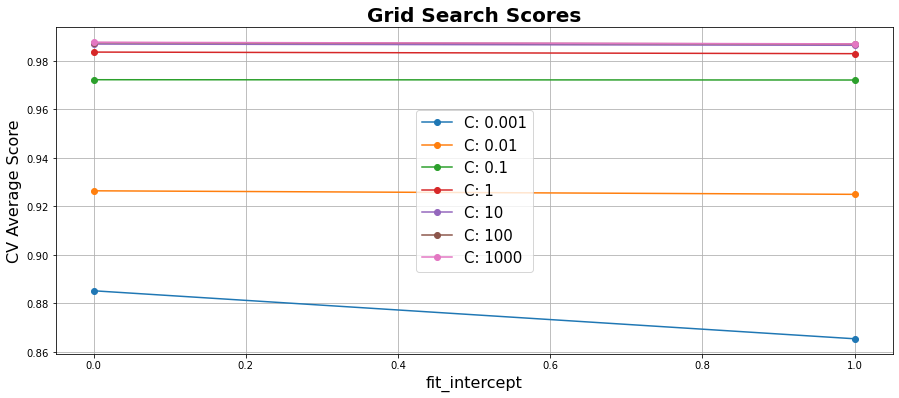

In [65]:
# Ploting Method 
plot_grid_search(lrs_cv.cv_results_, lr_param['fit_intercept'],lr_param['C'], 'fit_intercept', 'C')

### SVM Classifier Scaling

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [328]:
svc = SVC(probability=True)
svc_param = {
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'C' : [0.1,1,10,100],
    'gamma' :['scale','auto']
}

In [329]:
#CV for svc
svc_cv = GridSearchCV(svc,svc_param, cv= 10)
svc_cv.fit(X_train_minmax, y_train.values.ravel())

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [330]:
svc_cv.best_estimator_

SVC(C=100, probability=True)

In [25]:
mean_svc_cv = print_results(svc_cv)
mean_svc_cv

#Sigmoid is worst performance, poly with a auto gamma not significant

BEST Params: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

0.977 (+/-0.006) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.973 (+/-0.006) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.982 (+/-0.005) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.611 (+/-0.1) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.977 (+/-0.006) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.726 (+/-0.014) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
0.968 (+/-0.008) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.964 (+/-0.006) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.985 (+/-0.005) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.981 (+/-0.006) for {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.993 (+/-0.002) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.608 (+/-0.101) for {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.985 (+/-0.005) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.88 (+/-0.014) for {'C': 1, 'gamma': 'auto', 'kernel': 'po

(array([0.97736234, 0.97301338, 0.98233673, 0.61050708, 0.97736234,
        0.72614101, 0.96809875, 0.96422637, 0.98549405, 0.98093661,
        0.99323844, 0.60800496, 0.98549405, 0.87975122, 0.98349839,
        0.97906019, 0.9876089 , 0.98605981, 0.99636604, 0.60782624,
        0.9876089 , 0.96452419, 0.99186826, 0.9456695 , 0.98787696,
        0.98915769, 0.99758728, 0.60779645, 0.98787696, 0.96550718,
        0.99547241, 0.94176742]),
 array([0.002836  , 0.00304855, 0.0026856 , 0.05012044, 0.002836  ,
        0.00695888, 0.00397655, 0.00321776, 0.00251225, 0.00281563,
        0.00113839, 0.0504933 , 0.00251225, 0.00705014, 0.00217125,
        0.00326115, 0.00210157, 0.00207149, 0.00102143, 0.05043377,
        0.00210157, 0.00299854, 0.00184596, 0.00501073, 0.001897  ,
        0.00179767, 0.000983  , 0.05044712, 0.001897  , 0.00310404,
        0.00141488, 0.00522907]))

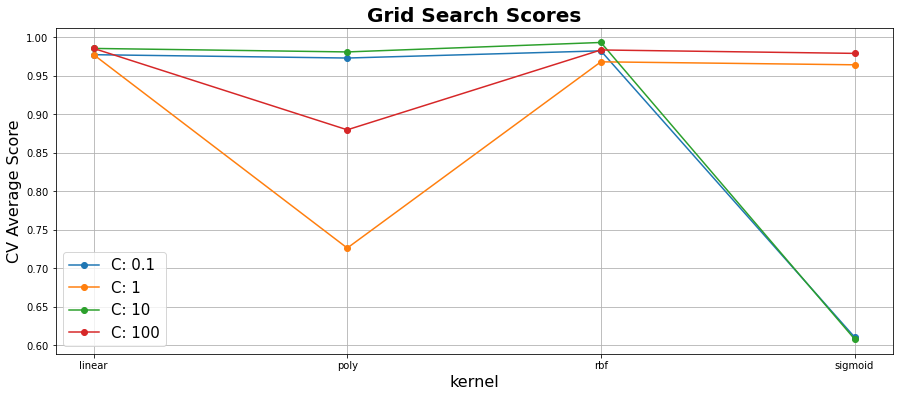

In [331]:
# Calling Method 
plot_grid_search(svc_cv.cv_results_,svc_param['kernel'], svc_param['C'], 'kernel', 'C')

In [36]:
svc_cv.cv_results_

{'mean_fit_time': array([ 4.48864701,  3.68801546,  5.0092535 , 13.01887939,  4.454862  ,
        50.70946641,  9.86630678, 12.30774384,  2.74510632,  4.61466324,
         3.13501208, 15.20013843,  2.45124891, 10.94166026,  5.63911386,
         6.01536021,  2.14446263,  7.3783411 ,  1.39961209, 12.98907344,
         2.84722462,  7.16193969,  2.77082775,  2.17174392,  2.98500965,
        21.23292344,  1.097172  , 14.67343781,  2.87427335,  4.37666714,
         1.57471561,  1.74753451]),
 'std_fit_time': array([8.80200511e-02, 1.87822813e-01, 1.31304545e-01, 9.38226552e-01,
        1.18569267e-01, 1.10006934e+02, 7.33147277e-01, 8.63164961e-01,
        1.15986790e-01, 3.44176428e-01, 3.92888935e-01, 2.64837190e+00,
        1.23994280e-01, 1.37917445e+00, 4.83313201e-01, 1.00550272e-01,
        3.12315394e-01, 2.83798818e-01, 1.85215329e-01, 8.60492415e-01,
        1.52442017e+00, 7.45173828e-01, 2.57885862e-01, 1.29478268e-01,
        1.76867651e-01, 1.75569173e+00, 6.36382610e-02, 6.733

# Random Forest without Scaling

In [67]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [69]:
# Hyer parameters for classification (Random, decision tree, etc.)
tree_param = {
    'n_estimators': [5,50,150,250], #number of Trees
    'max_depth' :[4,16,32,None],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [8, 10, 12,14]
}
rd = RandomForestClassifier()

In [71]:
rd_cv = GridSearchCV(rd,tree_param, cv= 10)
rd_cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 16, 32, None],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [8, 10, 12, 14],
                         'n_estimators': [5, 50, 150, 250]})

In [73]:
mean_rd_cv = print_results(rd_cv)

BEST Params: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 250}

0.93 (+/-0.02) for {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 5}
0.944 (+/-0.01) for {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}
0.941 (+/-0.01) for {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 150}
0.941 (+/-0.004) for {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 250}
0.945 (+/-0.031) for {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 5}
0.94 (+/-0.016) for {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.939 (+/-0.009) for {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 150}
0.941 (+/-0.008) for {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 250}
0.932 (+/-0.024) for {'max_depth': 4, 'min_samples_leaf': 3

In [216]:
rd_cv.best_estimator_

RandomForestClassifier(max_depth=16, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=250)

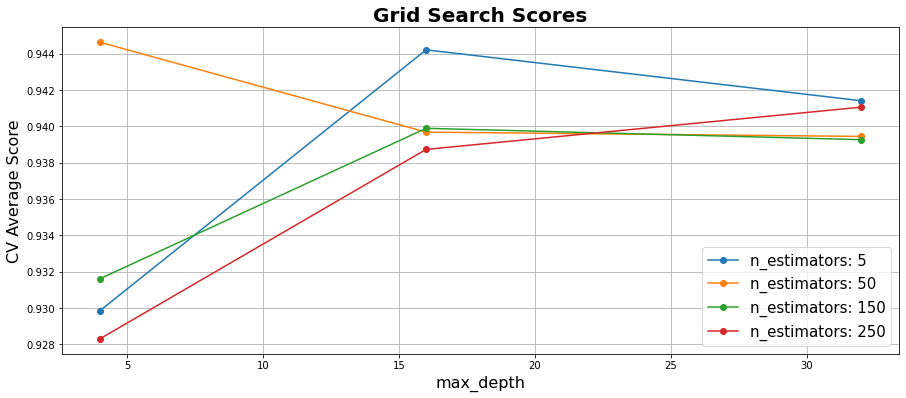

In [81]:
#Calling Method 
plot_grid_search(rd_cv.cv_results_, tree_param['max_depth'],tree_param['n_estimators'], 'max_depth', 'n_estimators')

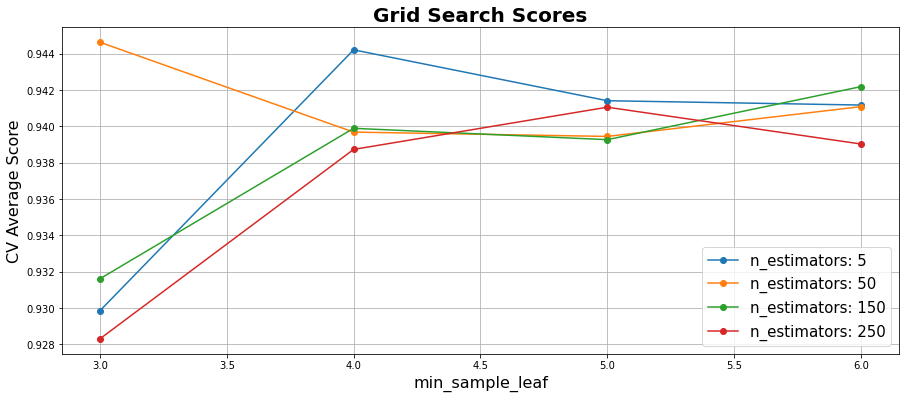

In [82]:
#Calling Method 
plot_grid_search(rd_cv.cv_results_, tree_param['min_samples_leaf'],tree_param['n_estimators'], 'min_sample_leaf', 'n_estimators')

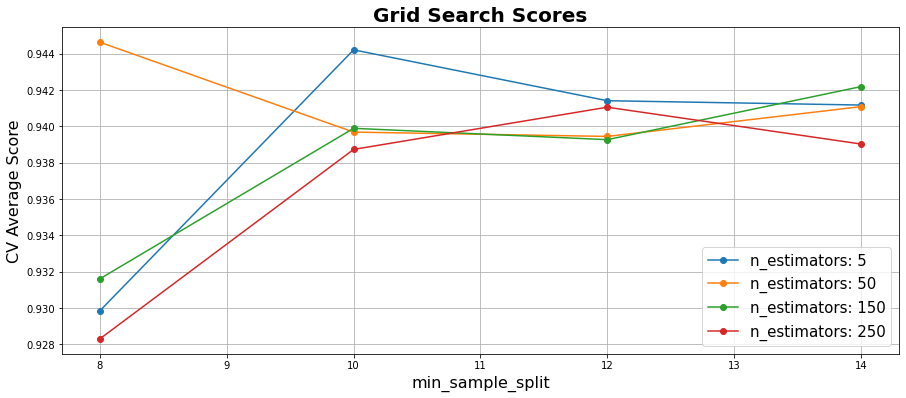

In [83]:
#Calling Method 
plot_grid_search(rd_cv.cv_results_, tree_param['min_samples_split'],tree_param['n_estimators'], 'min_sample_split', 'n_estimators')

# Gradient Boosting by Xgboost

In [85]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [92]:
from sklearn import metrics

In [90]:
from sklearn.model_selection import cross_validate

In [302]:
# Hyer parameters for classification (Random, decision tree, etc.)
xgb_param = {
    'learning_rate':[0.01,0.1,0.5], 
    'gamma': [0,2,4,6,8,10],
    'sampling_method' : ['uniform','gradient_based'],
    'tree_method': ['exact','hist','approx']
    
}

In [193]:
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb,xgb_param, cv= 10)
xgb_cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [182]:
#Second Result
mean_xgb2_cv = print_results(xgb_cv)

BEST Params: {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 1, 'sampling_method': 'uniform', 'tree_method': 'approx'}

0.997 (+/-0.002) for {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'sampling_method': 'uniform', 'tree_method': 'exact'}
0.997 (+/-0.002) for {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'sampling_method': 'uniform', 'tree_method': 'hist'}
0.995 (+/-0.003) for {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'sampling_method': 'uniform', 'tree_method': 'approx'}
0.997 (+/-0.002) for {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'sampling_method': 'gradient_based', 'tree_method': 'exact'}
0.997 (+/-0.002) for {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'sampling_method': 'gradient_based', 'tree_method': 'hist'}
0.995 (+/-0.003) for {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'sampling_method': 'gradient_based', 'tree_method': 'approx'}
0.998 (+/-0.002) for {'booster': 'gbtree', 'gamma': 0, 'learning

In [187]:
xgb_cv.best_estimator_ #Result 2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, sampling_method='uniform',
              scale_pos_weight=1, subsample=1, tree_method='approx',
              validate_parameters=1, verbosity=None)

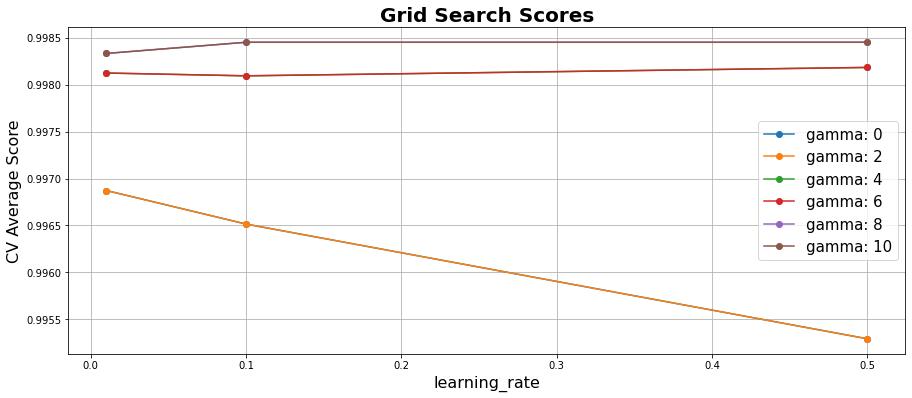

In [198]:
#Second Result
#Calling Method
plot_grid_search(xgb_cv.cv_results_, xgb_param['learning_rate'],xgb_param['gamma'], 'learning_rate', 'gamma')

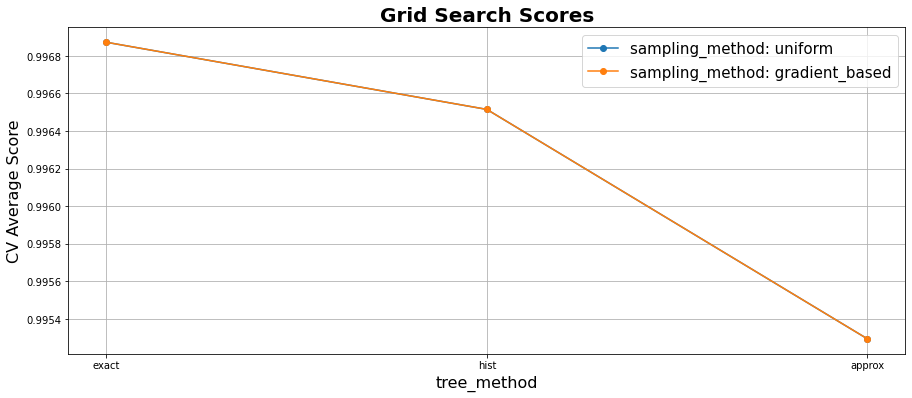

In [199]:
#Second result
#Calling Method
plot_grid_search(xgb_cv.cv_results_,xgb_param['tree_method'], xgb_param['sampling_method'], 'tree_method','sampling_method')


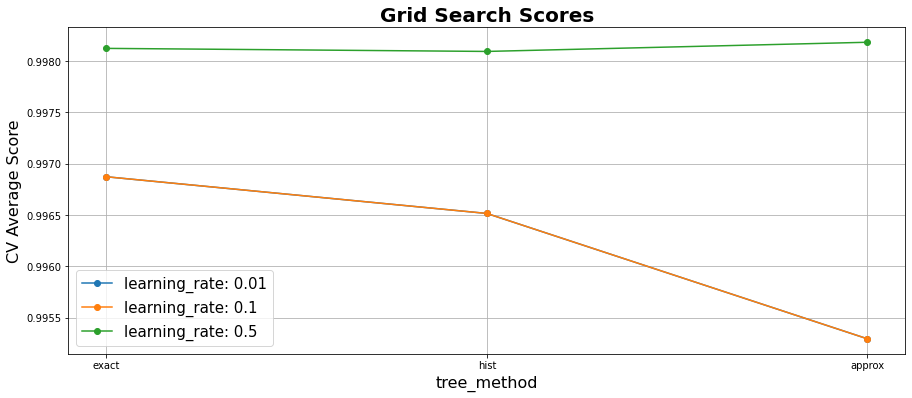

In [200]:
#Second result
#Calling Method
plot_grid_search(xgb_cv.cv_results_,xgb_param['tree_method'], xgb_param['learning_rate'], 'tree_method','learning_rate')



# Model Selection

In [227]:
from time import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [259]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 5)
    precision = round(precision_score(labels, pred), 5)
    recall = round(recall_score(labels, pred), 5)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [222]:
model=[cv.best_estimator_, lrs_cv.best_estimator_,rd_cv.best_estimator_,svc_cv.best_estimator_,xgb_cv.best_estimator_]
index_mod = ['LR','LRs','RDs','SVCs','XGBs']

In [224]:
dict_mod = dict(zip(index_mod,model))

In [225]:
dict_mod

{'LR': LogisticRegression(C=0.001, fit_intercept=False, max_iter=1000),
 'LRs': LogisticRegression(C=1000, fit_intercept=False, max_iter=1000),
 'RDs': RandomForestClassifier(max_depth=16, min_samples_leaf=3, min_samples_split=8,
                        n_estimators=250),
 'SVCs': SVC(C=100),
 'XGBs': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.5, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, sampling_method='uniform',
               scale_pos_weight=1, subsample=1, tree_method='approx',
               validate_parameters=1, verbosity=None)}

In [260]:
#Non-scaling Data
evaluate_model('Logistic_classifier', model[0], X_train, y_train)
evaluate_model('Logistic_classifier', model[0], X_test, y_test)

Logistic_classifier -- Accuracy: 0.98809 / Precision: 0.98496 / Recall: 0.99342 / Latency: 11.1ms
Logistic_classifier -- Accuracy: 0.98797 / Precision: 0.9842 / Recall: 0.99388 / Latency: 2.7ms


In [341]:
#Scaling Data testing set
for name, mdl in dict_mod.items():
    evaluate_model(name, mdl,X_test,y_test.values.ravel())

LR -- Accuracy: 0.98797 / Precision: 0.9842 / Recall: 0.99388 / Latency: 6.4ms
LRs -- Accuracy: 0.69189 / Precision: 0.9995 / Recall: 0.43497 / Latency: 7.8ms
RDs -- Accuracy: 0.99714 / Precision: 0.99521 / Recall: 0.99956 / Latency: 298.1ms
SVCs -- Accuracy: 0.99797 / Precision: 0.9963 / Recall: 1.0 / Latency: 40.9ms
XGBs -- Accuracy: 0.99857 / Precision: 0.99782 / Recall: 0.99956 / Latency: 12.3ms


In [342]:
#Scaling Data Training set
for name, mdl in dict_mod.items():
    evaluate_model(name, mdl,X_train,y_train.values.ravel()) 

LR -- Accuracy: 0.98809 / Precision: 0.98496 / Recall: 0.99342 / Latency: 2.7ms
LRs -- Accuracy: 0.69427 / Precision: 0.99988 / Recall: 0.44205 / Latency: 6.8ms
RDs -- Accuracy: 0.99857 / Precision: 0.9974 / Recall: 1.0 / Latency: 710.2ms
SVCs -- Accuracy: 0.99836 / Precision: 0.99702 / Recall: 1.0 / Latency: 154.0ms
XGBs -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 66.8ms


# Prediction

In [306]:
xgb_fitted = xgb_cv.best_estimator_.fit(X_train, y_train.values.ravel())

In [237]:
y_pred = xgb_fitted.predict(X_test)

In [254]:
comparison = y_pred == y_test.values.ravel()
equal_arrays = comparison.all()
print(equal_arrays)

False


### Euclidean Distanct

In [263]:
def rocZeroOne(y_true, y_predicted_porba):
    
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append([euclidean([x,y], best)])

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print('\n' + 'Best point on the ROC: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print('\n' + 'Best Cut-Off point: {:0.4f}'.format(bestCutOff1))

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
    fig.set_size_inches(15,5)


Best point on the ROC: TPR = 100.000%, FPR = 0.000%

Best Cut-Off point: 2.0000


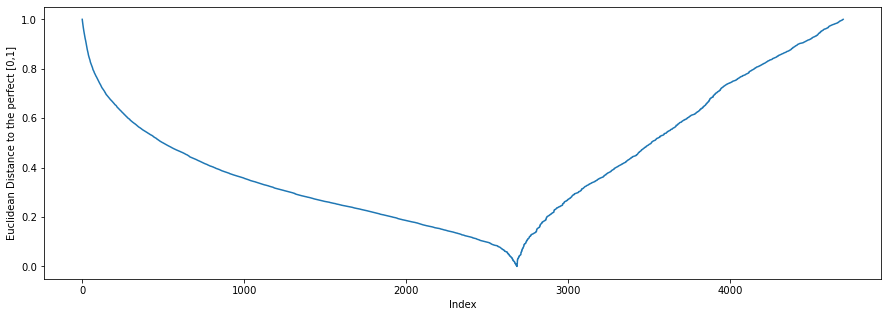

In [334]:
rocZeroOne(y_train.values.ravel(), xgb_cv.best_estimator_.fit(X_train, y_train.values.ravel()).predict_proba(X_train)) #Euclidean plot

### Manually Confusion Matrix

In [266]:
xgb_confusion = confusion_matrix(y_test, y_pred)
xgb_confusion

array([[3808,   10],
       [   2, 4573]])

In [356]:
def plot_confusion(model_matrix):    
    predicted = ['Predict_1', 'Predict_0']
    actual = ['Actual_1', 'Actual_0']

    fig, ax = plt.subplots()
    im = ax.imshow(model_matrix)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(actual)))
    ax.set_yticks(np.arange(len(predicted)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(actual)
    ax.set_yticklabels(predicted)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(actual)):
        for j in range(len(predicted)):
            text = ax.text(j, i, model_matrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.show()

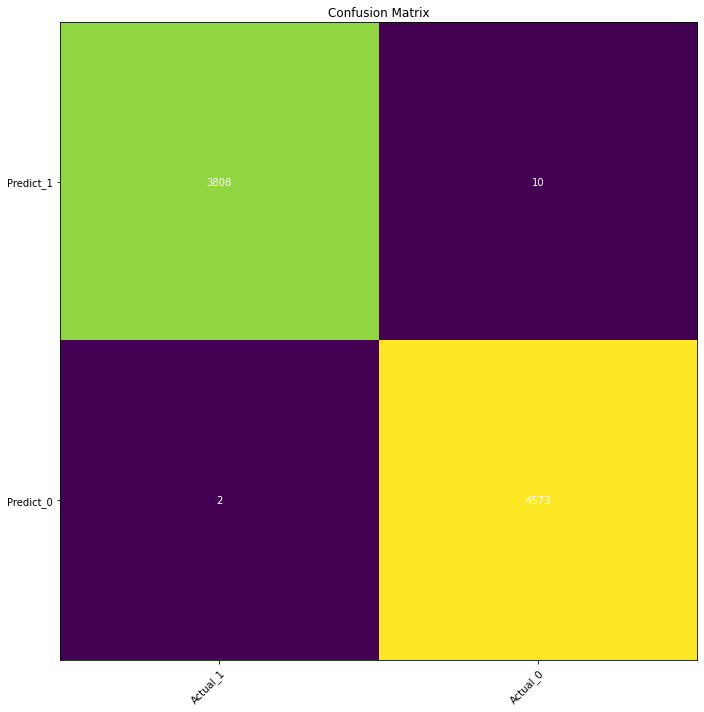

In [357]:
plot_confusion(xgb_confusion) #XGB Confusion Matrix

# Plot Tree

In [366]:
import xgboost as xgb

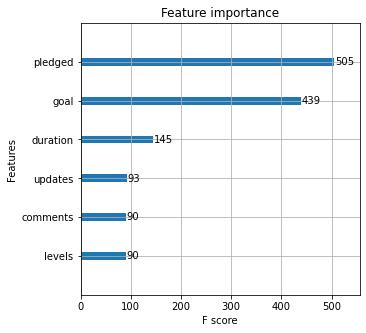

In [311]:
xgb.plot_importance(xgb_fitted)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

# SVM

In [314]:
#SVCs Model
svc_fitted = svc_cv.best_estimator_.fit(X_train, y_train.values.ravel())

In [315]:
y_pred_svc = svc_fitted.predict(X_test)

In [321]:
comparison_svc = y_pred_svc == y_test.values.ravel()
equal_arrays_svc = comparison_svc.all()
print(equal_arrays_svc) #Check every items is the same if False == No

False



Best point on the ROC: TPR = 100.000%, FPR = 0.184%

Best Cut-Off point: 0.8902


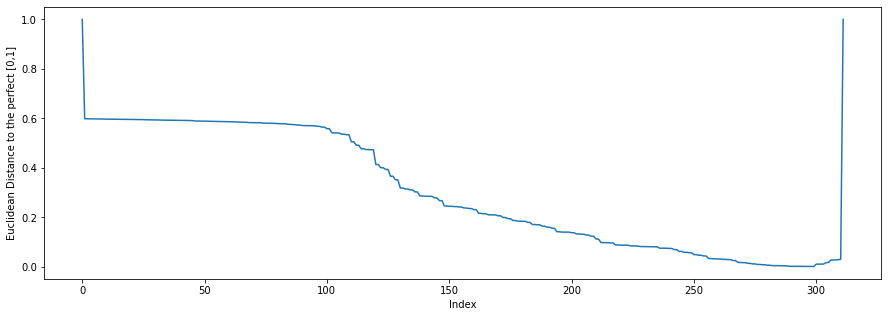

In [333]:
rocZeroOne(y_train.values.ravel(), svc_cv.best_estimator_.fit(X_train, y_train.values.ravel()).predict_proba(X_train)) #Euclidean plot

In [335]:
svc_confusion = confusion_matrix(y_test, y_pred_svc)
svc_confusion

array([[3801,   17],
       [   0, 4575]])

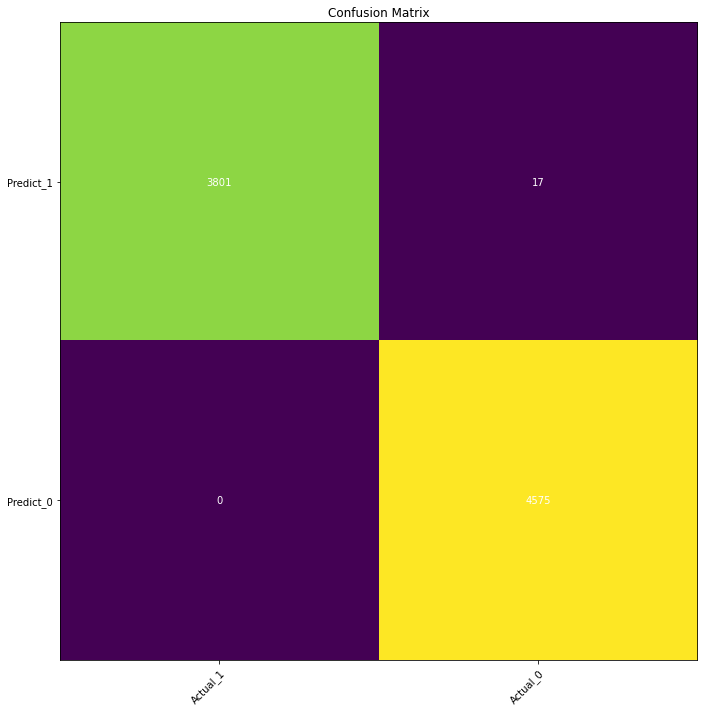

In [358]:
plot_confusion(svc_confusion) #SVC Confusion Matrix

# Worst Performance

In [343]:
#Logistic scaling Model
lrs_fitted = lrs_cv.best_estimator_.fit(X_train, y_train.values.ravel())

In [349]:
y_pred_lrs = lrs_fitted.predict(X_test)

In [350]:
comparison_lrs = y_pred_lrs == y_test.values.ravel()
equal_arrays_lrs = comparison_lrs.all()
print(equal_arrays_lrs) #Check every items is the same if False == No

False



Best point on the ROC: TPR = 99.130%, FPR = 1.673%

Best Cut-Off point: 0.5503


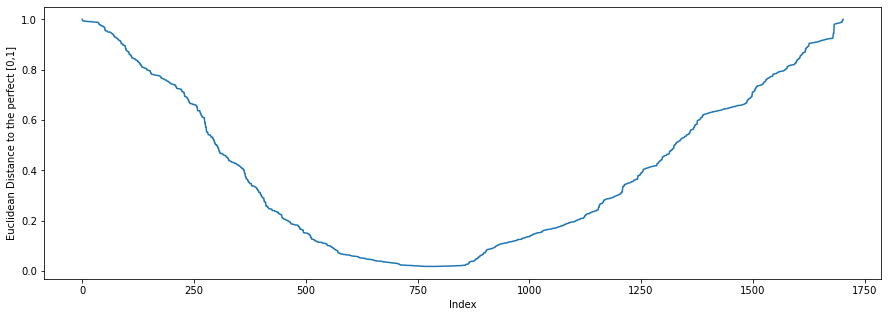

In [351]:
rocZeroOne(y_train.values.ravel(), lrs_cv.best_estimator_.fit(X_train, y_train.values.ravel()).predict_proba(X_train)) #Euclidean plot

In [352]:
lrs_confusion = confusion_matrix(y_test, y_pred_lrs)
lrs_confusion

array([[3740,   78],
       [  28, 4547]])

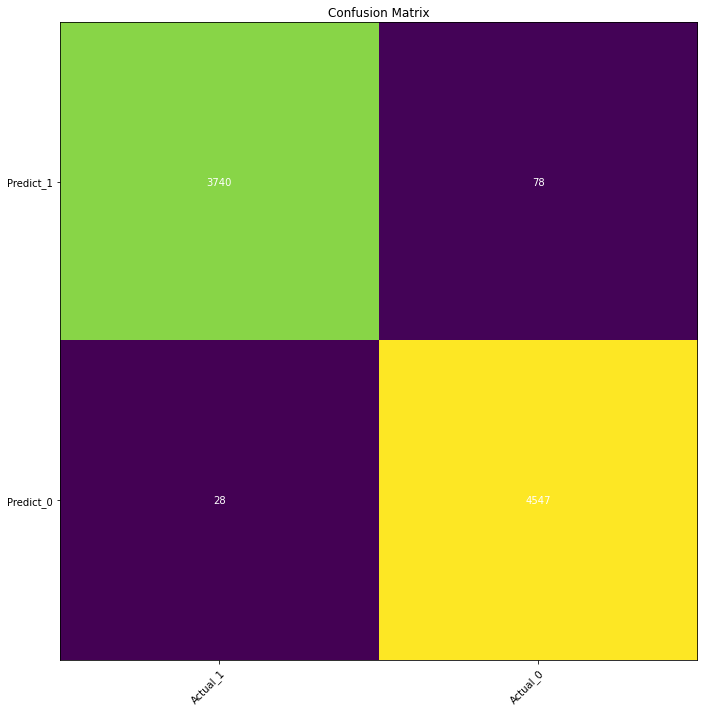

In [359]:
plot_confusion(lrs_confusion) #LRS Confusion Matrix

In [367]:
(3740+4547)/(3740+78+23+4547) #Look at this later

0.9879589890319505

In [368]:
accuracy_score(y_test.values.ravel(), y_pred_lrs) #Acc score above is correct!! Manually is better

0.9873704277374002

Find the definition of learning rate and gradient boosting before using it!!
https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/#:~:text=Slow%20Learning%20in%20Gradient%20Boosting,trees%20to%20the%20model%20sequentially.&text=A%20technique%20to%20slow%20down,when%20added%20to%20the%20model.